In [140]:
import pandas as pd
import numpy as np
import datetime as dt
import xml.etree.ElementTree as ET
from matplotlib import pyplot as plt  
plt.style.use('fivethirtyeight')

etree = ET.parse("export.xml")

attribute_list = []

for child in etree.getroot():
    child_attrib = child.attrib
    for metadata_entry in list(child):
        metadata_values = list(metadata_entry.attrib.values())
        if len(metadata_values) == 2:
            metadata_dict = {metadata_values[0]: metadata_values[1]}
            child_attrib.update(metadata_dict)

    attribute_list.append(child_attrib)
health_df = pd.DataFrame(attribute_list)
health_df = health_df[health_df['value'] != 'HKCategoryValueSleepAnalysisInBed']
health_df = health_df.dropna(thresh=2)
health_df = health_df.drop(columns=['HKCharacteristicTypeIdentifierDateOfBirth',
                                   'HKCharacteristicTypeIdentifierBiologicalSex',
                                   'HKCharacteristicTypeIdentifierBloodType',
                                   'HKCharacteristicTypeIdentifierFitzpatrickSkinType',
                                   'sourceName',
                                   'sourceVersion',
                                   'creationDate',
                                   'endDate',
                                   'device'])
health_df['Date'] = pd.to_datetime(pd.to_datetime(health_df['startDate'], format='%Y-%m-%d %H:%M:%S %z').dt.normalize()).dt.tz_localize(None) #TODO
health_df = health_df[['Date','month_year','year','type','value','unit','meal']]
health_df['type'] = health_df['type'].str.replace('HKQuantityTypeIdentifier', '', regex=True)
health_df = health_df
health_df

fitness_rolling_agg = 7


In [141]:
type_list = health_df['type'].unique().tolist()
ignore = ['Height',
          'HKCategoryTypeIdentifierAppleStandHour',
          'HKCategoryTypeIdentifierMindfulSession',
          'HKCategoryTypeIdentifierLowHeartRateEvent',
          'HeartRateVariabilitySDNN',
         'AppleExerciseTime',
         'AppleStandTime']
type_list.pop(0)
type_list = [x for x in type_list if (x not in ignore)]
type_list

['BodyMass',
 'HeartRate',
 'StepCount',
 'DistanceWalkingRunning',
 'BasalEnergyBurned',
 'ActiveEnergyBurned',
 'FlightsClimbed',
 'DietaryFatTotal',
 'DietaryFatPolyunsaturated',
 'DietaryFatMonounsaturated',
 'DietaryFatSaturated',
 'DietaryCholesterol',
 'DietarySodium',
 'DietaryCarbohydrates',
 'DietaryFiber',
 'DietarySugar',
 'DietaryEnergyConsumed',
 'DietaryProtein',
 'DietaryVitaminC',
 'DietaryCalcium',
 'DietaryIron',
 'DietaryPotassium',
 'DistanceCycling',
 'RestingHeartRate',
 'VO2Max',
 'WalkingHeartRateAverage',
 'EnvironmentalAudioExposure',
 'HeadphoneAudioExposure']

In [142]:
health_df

,Date,month_year,year,type,value,unit,meal
1,NaT,NaT,NaT,NaN,NaN,NaN,NaN
2,2020-08-04,2020-08,2020,Height,6.25,ft,NaN
3,2020-08-04,2020-08,2020,Height,6.25,ft,NaN
4,2020-05-20,2020-05,2020,BodyMass,251.7,lb,NaN
5,2020-05-21,2020-05,2020,BodyMass,249.6,lb,NaN
...,...,...,...,...,...,...,...
242283,2020-09-08,2020-09,2020,HeartRateVariabilitySDNN,50.3016,ms,NaN
242284,2020-09-08,2020-09,2020,HeartRateVariabilitySDNN,43.8092,ms,NaN
242285,2020-09-08,2020-09,2020,HeartRateVariabilitySDNN,78.6181,ms,NaN
242286,2020-09-08,2020-09,2020,HeartRateVariabilitySDNN,39.7492,ms,NaN


In [143]:
health_df[health_df['type']=='HKCategoryTypeIdentifierAppleStandHour']

,Date,month_year,year,type,value,unit,meal
240936,2020-08-04,2020-08,2020,HKCategoryTypeIdentifierAppleStandHour,HKCategoryValueAppleStandHourStood,NaN,NaN
240937,2020-08-04,2020-08,2020,HKCategoryTypeIdentifierAppleStandHour,HKCategoryValueAppleStandHourStood,NaN,NaN
240938,2020-08-04,2020-08,2020,HKCategoryTypeIdentifierAppleStandHour,HKCategoryValueAppleStandHourIdle,NaN,NaN
240939,2020-08-04,2020-08,2020,HKCategoryTypeIdentifierAppleStandHour,HKCategoryValueAppleStandHourStood,NaN,NaN
240940,2020-08-04,2020-08,2020,HKCategoryTypeIdentifierAppleStandHour,HKCategoryValueAppleStandHourStood,NaN,NaN
...,...,...,...,...,...,...,...
241795,2020-09-08,2020-09,2020,HKCategoryTypeIdentifierAppleStandHour,HKCategoryValueAppleStandHourStood,NaN,NaN
241796,2020-09-08,2020-09,2020,HKCategoryTypeIdentifierAppleStandHour,HKCategoryValueAppleStandHourStood,NaN,NaN
241797,2020-09-08,2020-09,2020,HKCategoryTypeIdentifierAppleStandHour,HKCategoryValueAppleStandHourStood,NaN,NaN
241798,2020-09-08,2020-09,2020,HKCategoryTypeIdentifierAppleStandHour,HKCategoryValueAppleStandHourStood,NaN,NaN


In [184]:
health_type_goal_dict = {'BodyMass':200,
                         'StepCount':10000,
                         'DistanceWalkingRunning':10,
                         'FlightsClimbed':20,
                         'DietaryFatTotal':63,
                         'DietaryFatPolyunsaturated':0,
                         'DietaryFatMonounsaturated':0,
                         'DietaryFatSaturated':21,
                         'DietaryCholesterol':300,
                         'DietarySodium':2300,
                         'DietaryCarbohydrates':239,
                         'DietaryFiber':38,
                         'DietarySugar':72,
                         'DietaryEnergyConsumed':1720,
                         'DietaryProtein':96,
                         'DietaryVitaminC':100,
                         'DietaryCalcium':100,
                         'DietaryIron':100,
                         'DietaryPotassium':3500,
                         'HeadphoneAudioExposure':75,
                         'EnvironmentalAudioExposure':100,
                         'ActiveEnergyBurned':600,
                         'BasalEnergyBurned':1750,
                         'VO2Max':43,
                         'HeartRate':65,
                         'WalkingHeartRateAverage':95,
                         'RestingHeartRate':50
                        }
health_type_goal_dict


{'BodyMass': 200,
 'StepCount': 10000,
 'DistanceWalkingRunning': 10,
 'FlightsClimbed': 20,
 'DietaryFatTotal': 63,
 'DietaryFatPolyunsaturated': 0,
 'DietaryFatMonounsaturated': 0,
 'DietaryFatSaturated': 21,
 'DietaryCholesterol': 300,
 'DietarySodium': 2300,
 'DietaryCarbohydrates': 239,
 'DietaryFiber': 38,
 'DietarySugar': 72,
 'DietaryEnergyConsumed': 1720,
 'DietaryProtein': 96,
 'DietaryVitaminC': 100,
 'DietaryCalcium': 100,
 'DietaryIron': 100,
 'DietaryPotassium': 3500,
 'HeadphoneAudioExposure': 75,
 'EnvironmentalAudioExposure': 100,
 'ActiveEnergyBurned': 600,
 'BasalEnergyBurned': 1750,
 'VO2Max': 43,
 'HeartRate': 65,
 'WalkingHeartRateAverage': 95,
 'RestingHeartRate': 50}

max
BodyMass Aggregated and Graphed and Appended
mean
HeartRate Aggregated and Graphed and Appended
sum
StepCount Aggregated and Graphed and Appended
sum
DistanceWalkingRunning Aggregated and Graphed and Appended
sum
BasalEnergyBurned Aggregated and Graphed and Appended
sum
ActiveEnergyBurned Aggregated and Graphed and Appended
sum
FlightsClimbed Aggregated and Graphed and Appended
sum
DietaryFatTotal Aggregated and Graphed and Appended
sum
DietaryFatPolyunsaturated Aggregated and Graphed and Appended
sum
DietaryFatMonounsaturated Aggregated and Graphed and Appended
sum
DietaryFatSaturated Aggregated and Graphed and Appended
sum
DietaryCholesterol Aggregated and Graphed and Appended
sum
DietarySodium Aggregated and Graphed and Appended
sum
DietaryCarbohydrates Aggregated and Graphed and Appended
sum
DietaryFiber Aggregated and Graphed and Appended
sum
DietarySugar Aggregated and Graphed and Appended
sum
DietaryEnergyConsumed Aggregated and Graphed and Appended
sum
DietaryProtein Aggreg

C:\Users\kylej\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\kylej\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\kylej\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplo

sum
DietaryPotassium Aggregated and Graphed and Appended
sum
DistanceCycling Aggregated and Graphed and Appended
sum
RestingHeartRate Aggregated and Graphed and Appended


C:\Users\kylej\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\kylej\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


mean
VO2Max Aggregated and Graphed and Appended
sum
WalkingHeartRateAverage Aggregated and Graphed and Appended
sum
EnvironmentalAudioExposure Aggregated and Graphed and Appended


C:\Users\kylej\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\kylej\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\kylej\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplo

mean
HeadphoneAudioExposure Aggregated and Graphed and Appended


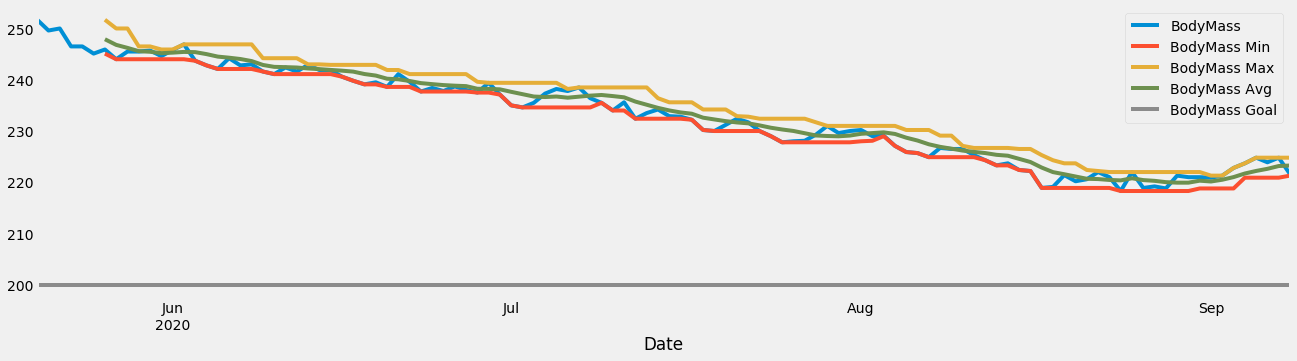

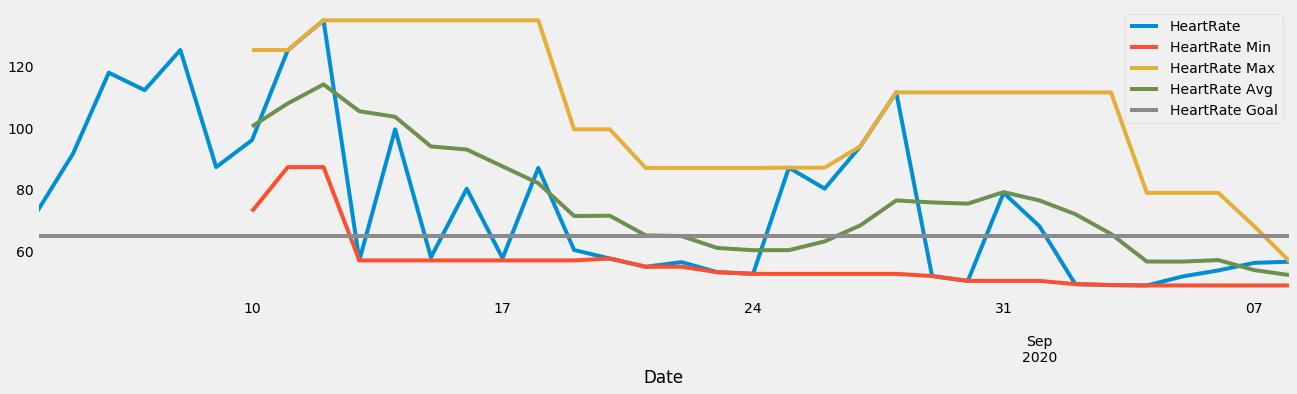

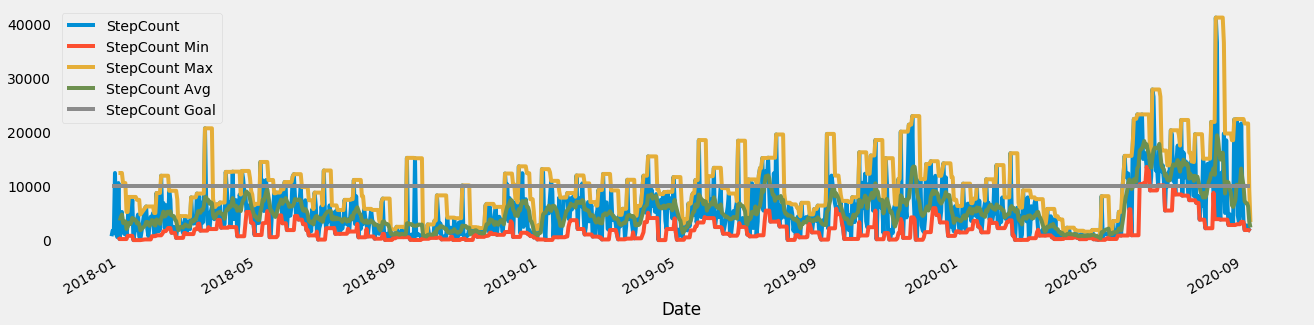

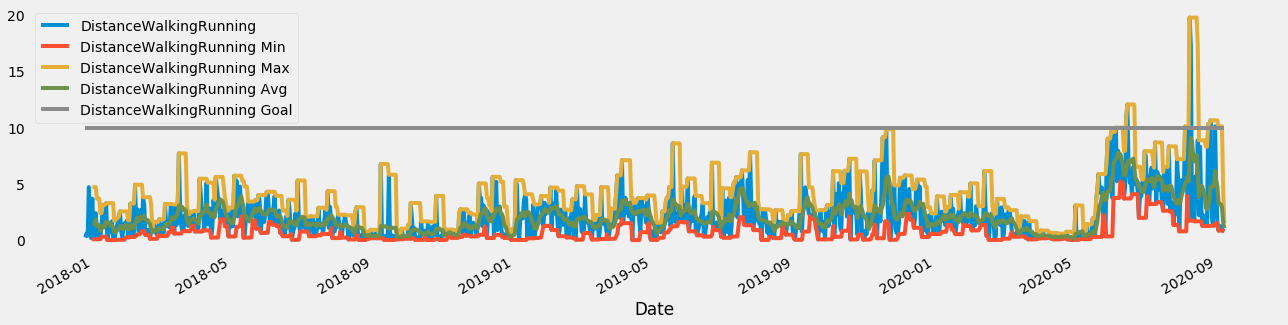

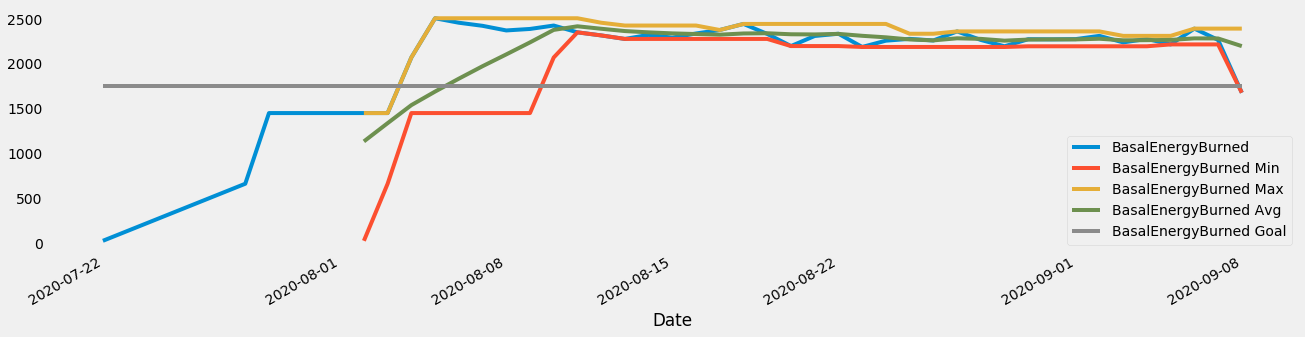

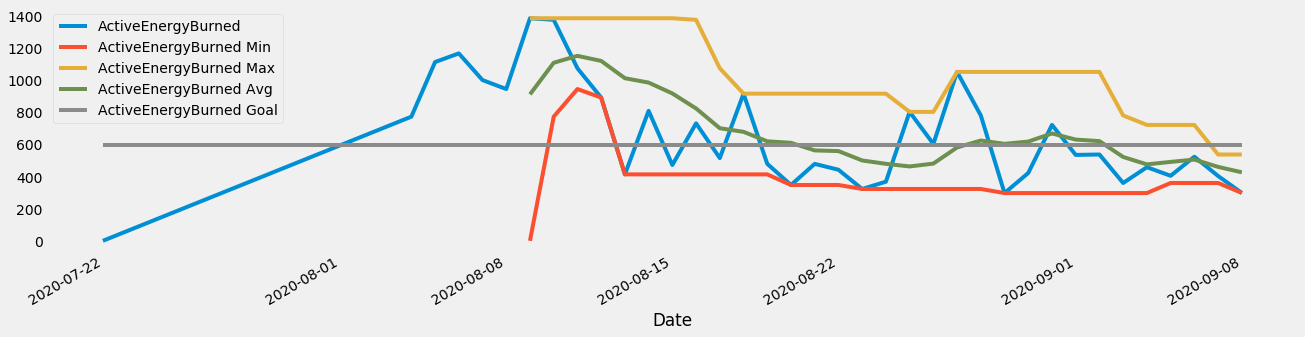

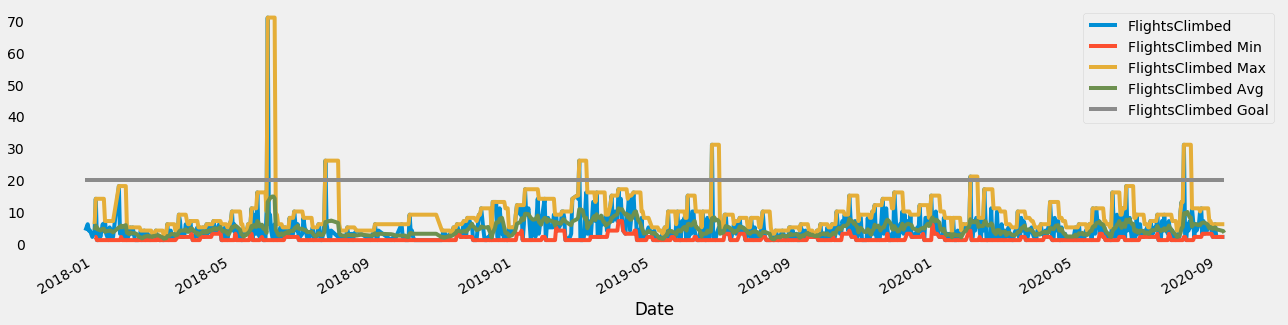

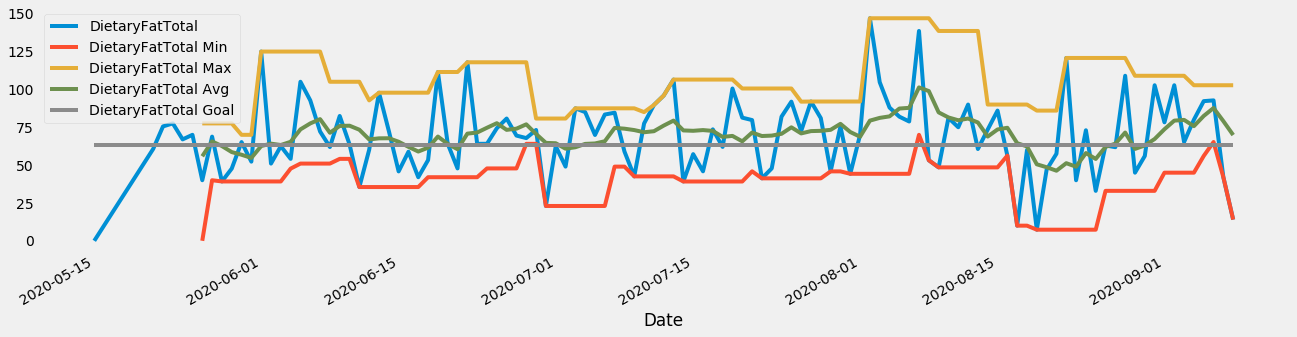

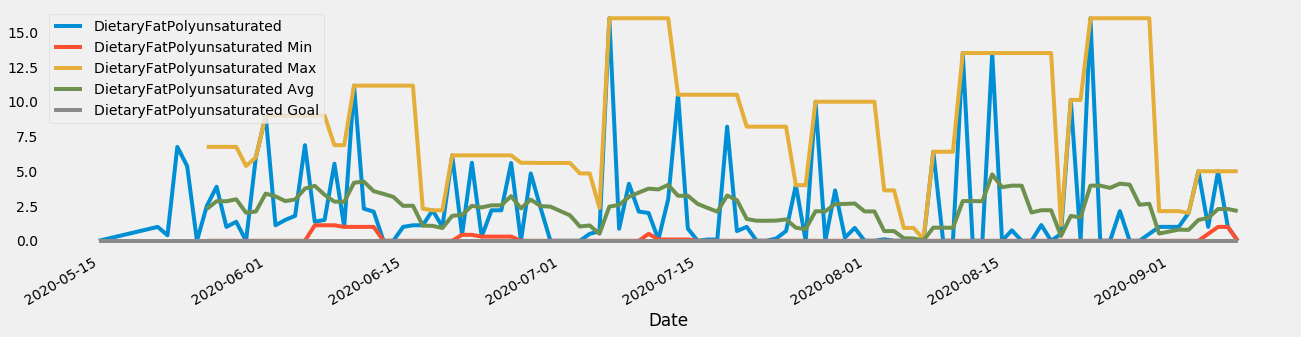

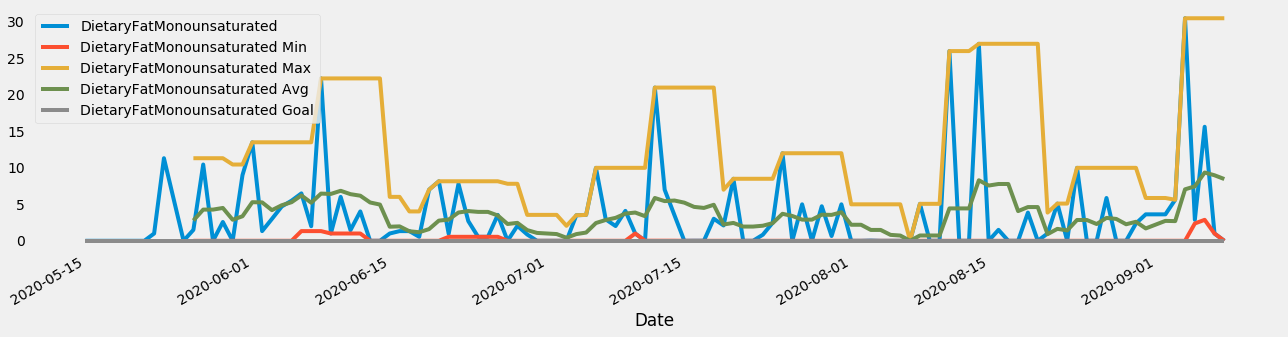

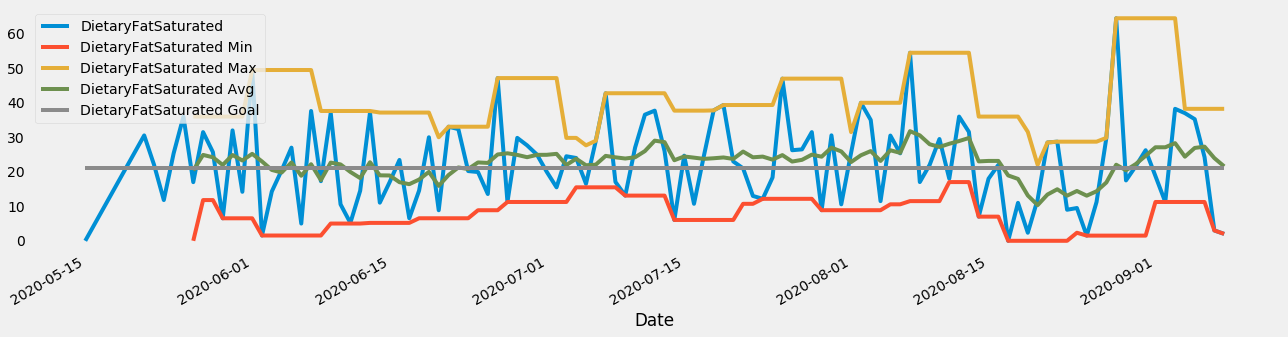

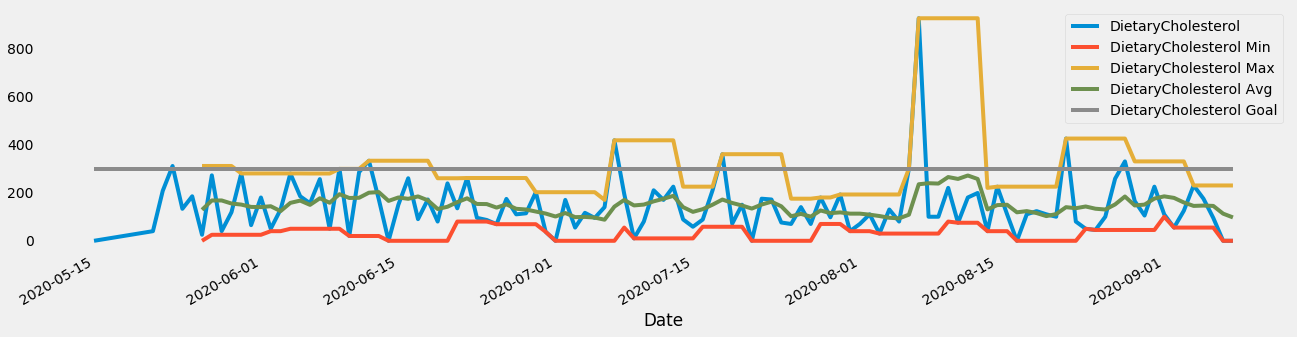

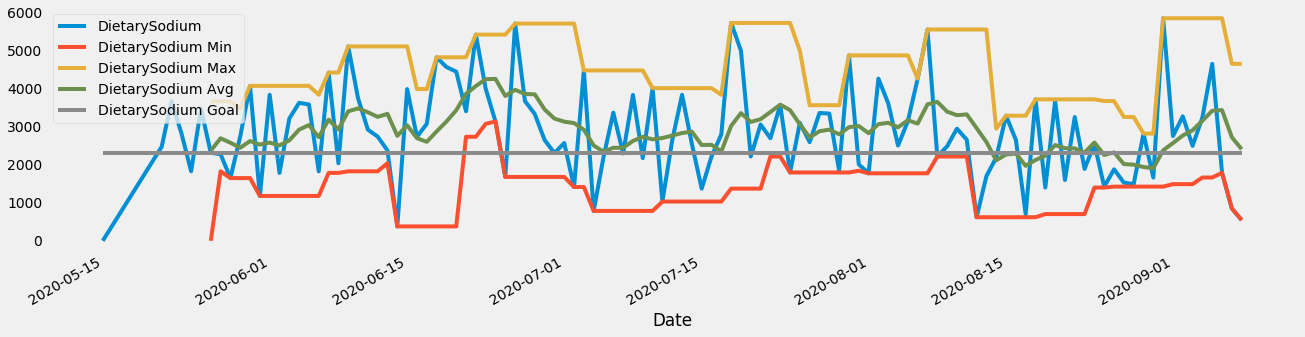

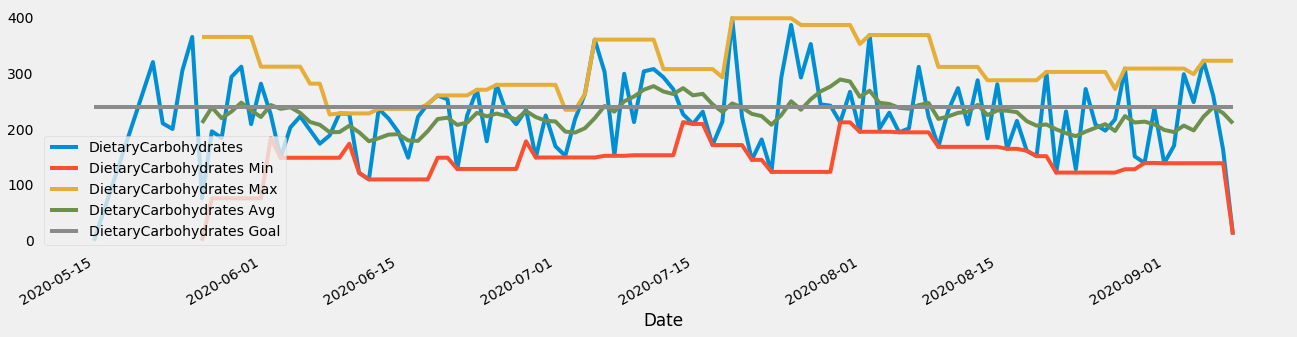

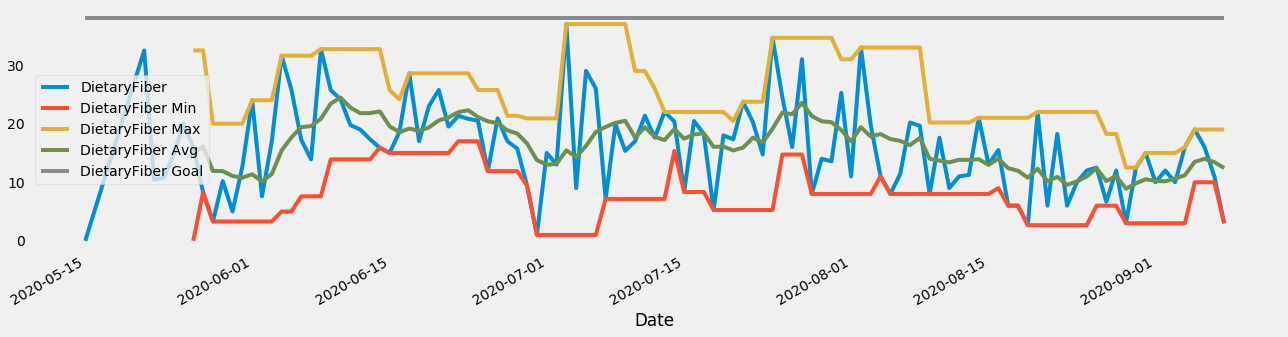

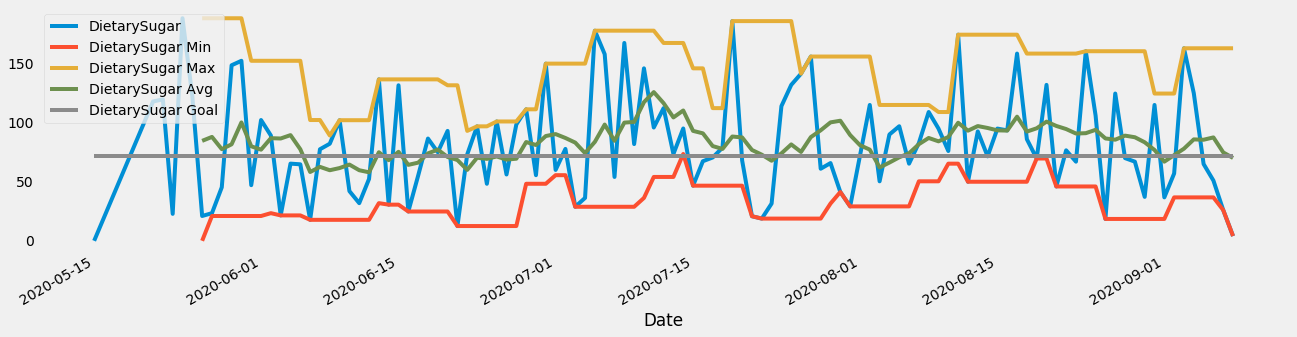

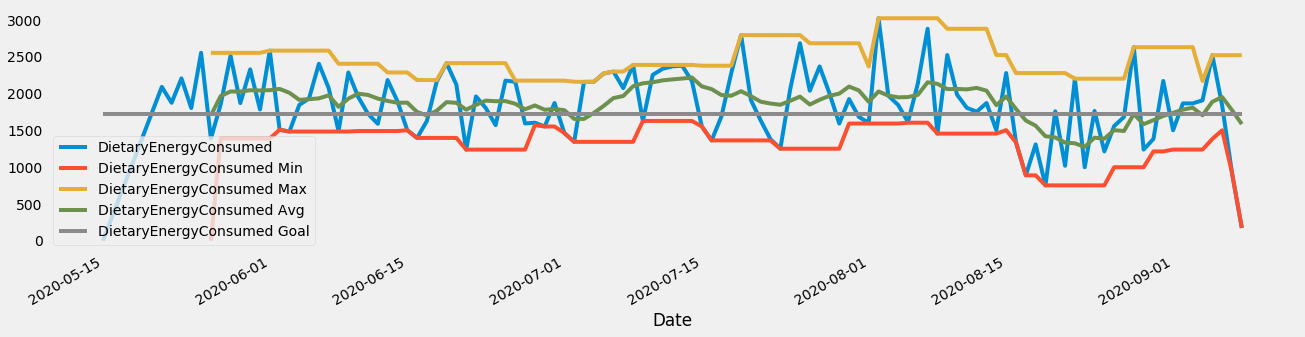

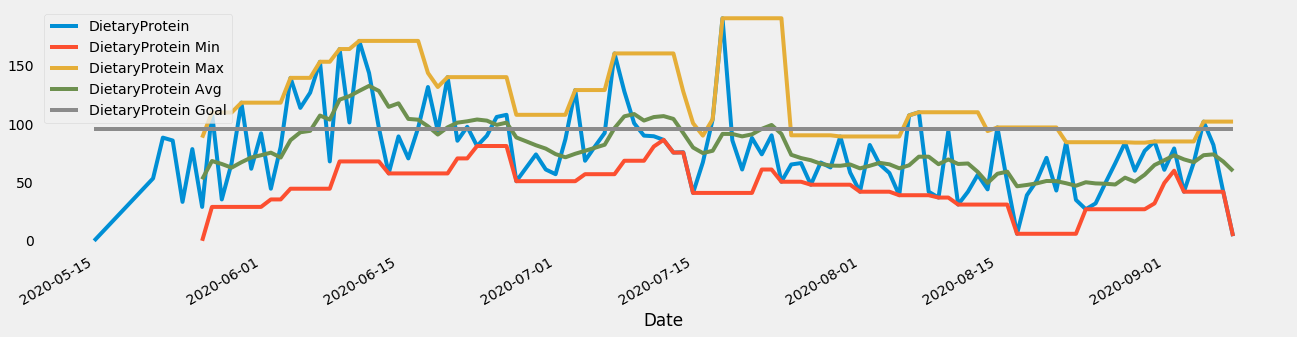

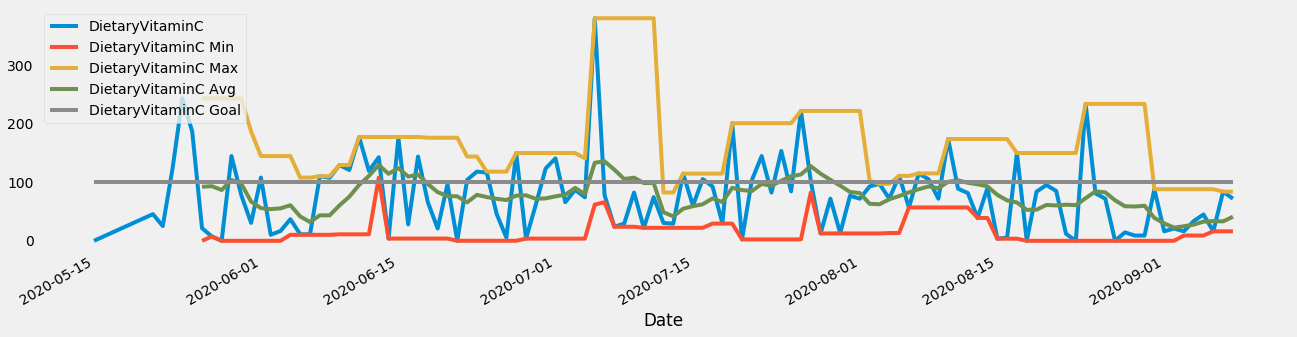

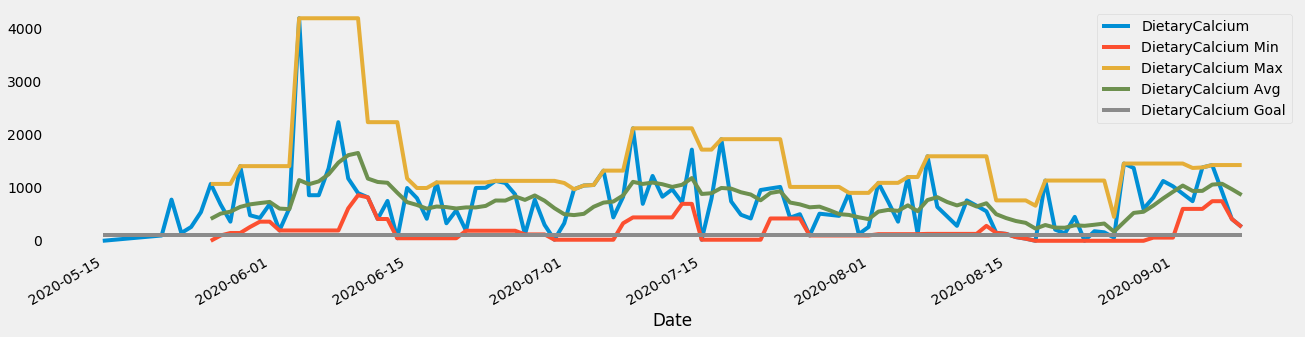

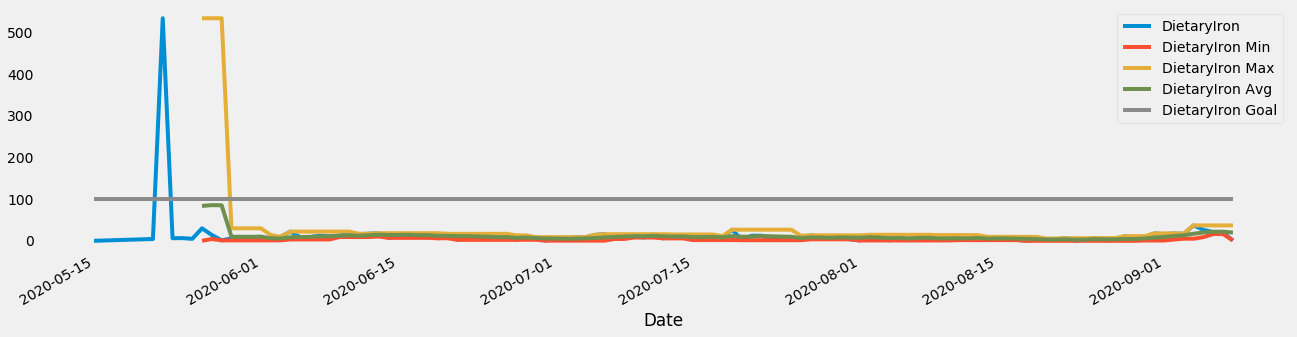

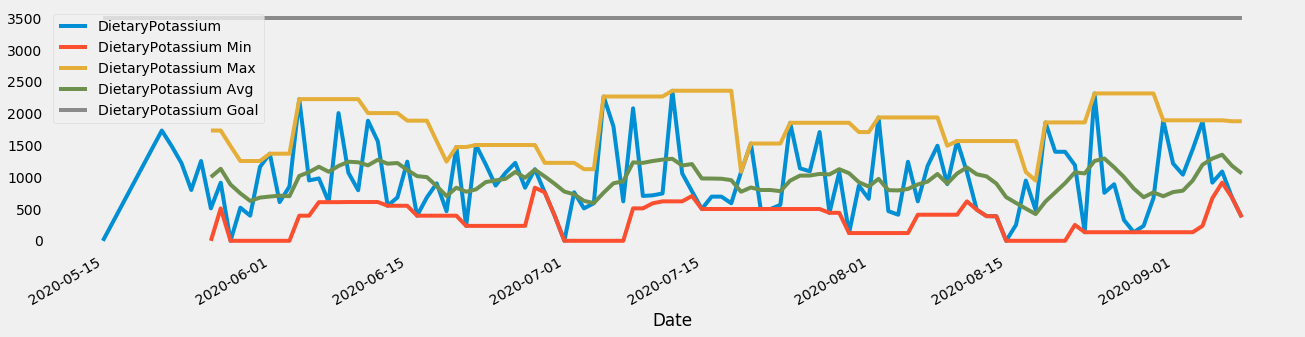

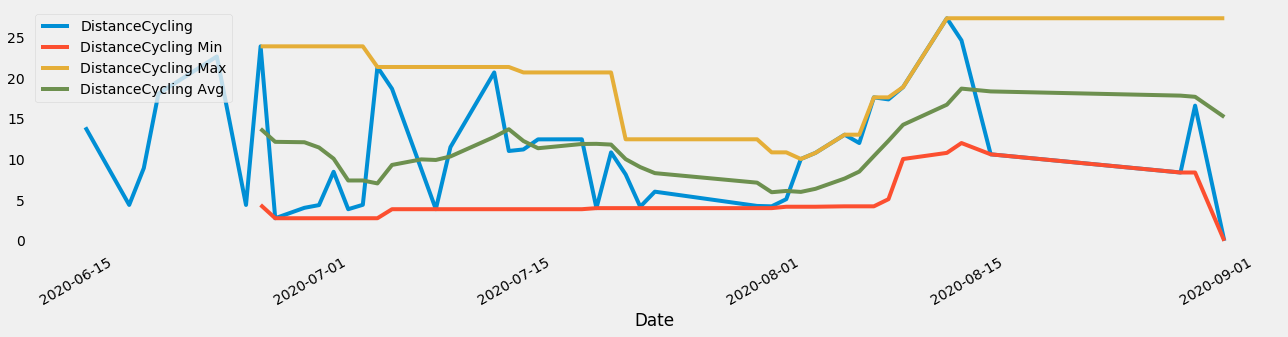

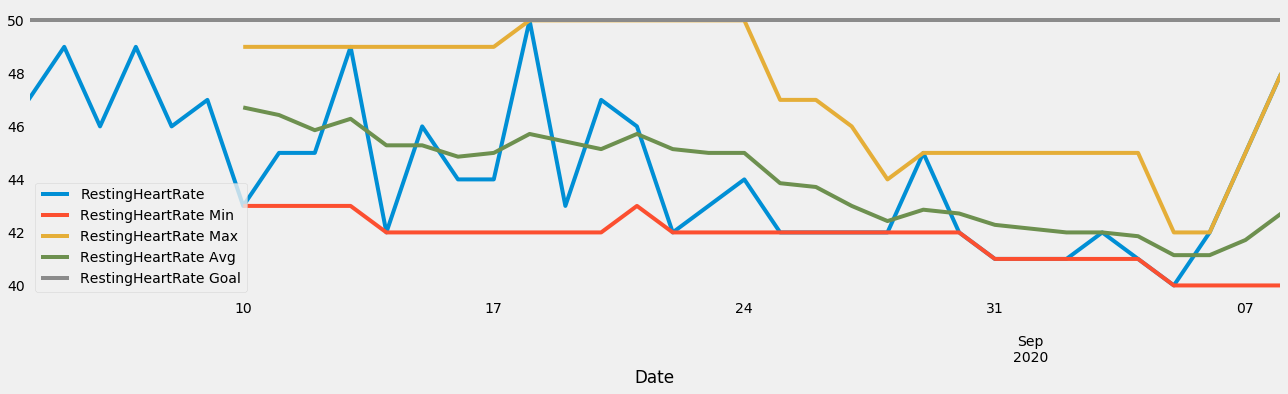

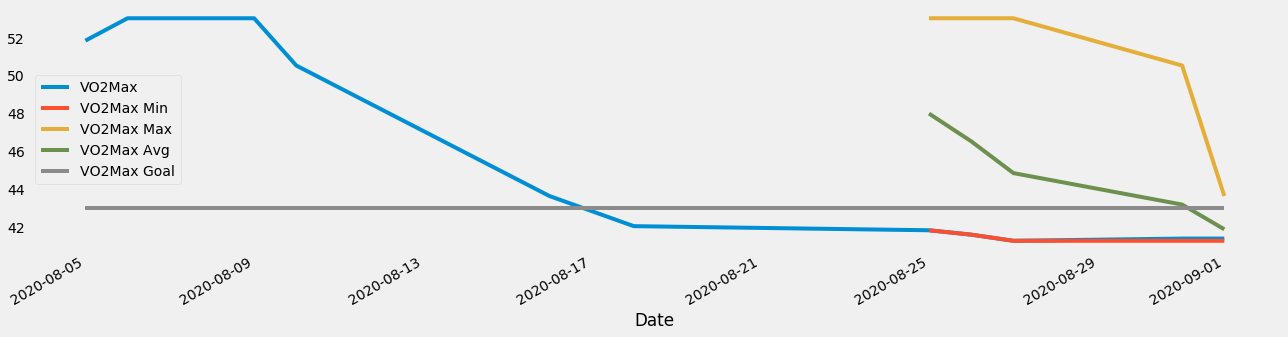

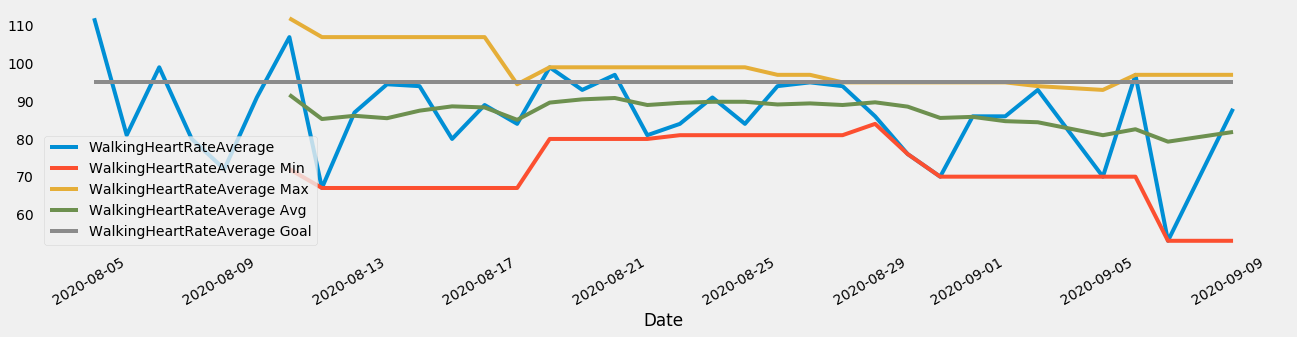

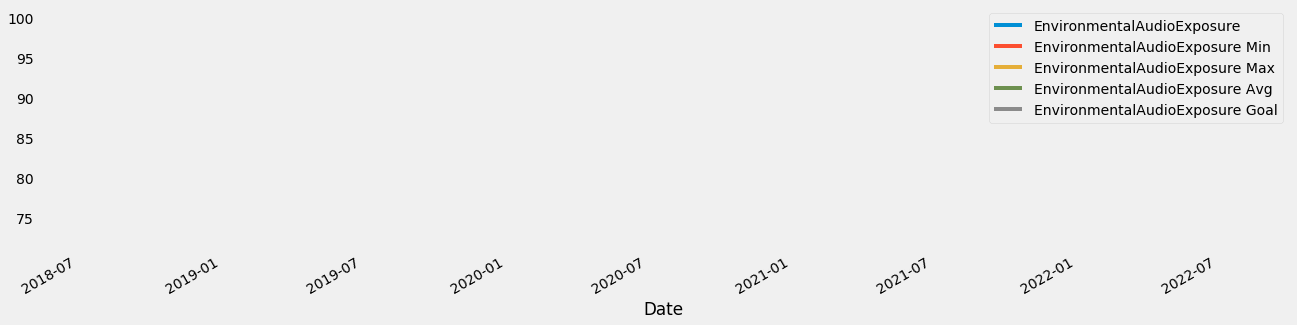

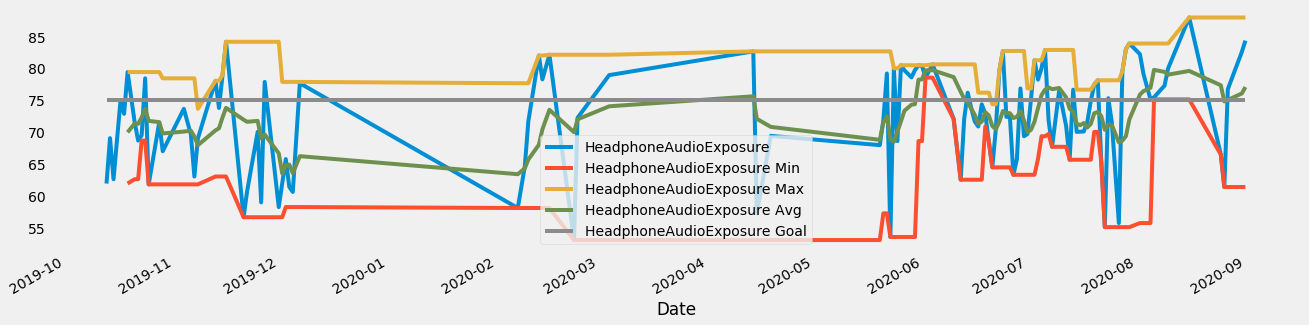

In [185]:
appended_health_data = []
for i in type_list: 
    lookup = i
    df = health_df[health_df['type'] == lookup]
    df = df.astype({"value":'float'})
    if i == 'BodyMass':
        df_agg = df.groupby('Date')['value'].max().to_frame().reset_index().rename(columns={'value':lookup})
        print('max')
    elif (i == 'HeadphoneAudioExposure')|(i == 'VO2Max')|(i == 'HeartRate'):
        df_agg = df.groupby('Date')['value'].mean().to_frame().reset_index().rename(columns={'value':lookup})
        print('mean')
    else:
        df_agg = df.groupby('Date')['value'].sum().to_frame().reset_index().rename(columns={'value':lookup})
        print('sum')
    df_agg[lookup+' Min'] = df_agg[lookup].rolling(fitness_rolling_agg).min()
    df_agg[lookup+' Max'] = df_agg[lookup].rolling(fitness_rolling_agg).max()
    df_agg[lookup+' Avg'] = df_agg[lookup].rolling(fitness_rolling_agg).mean()
    df_agg[lookup+' Goal'] =  health_type_goal_dict.get(i)
    appended_health_data.append(df_agg)
    print(i + ' Aggregated and Graphed and Appended')
    df_agg.plot(kind='line',
             x='Date',
             y=[lookup,lookup+' Min',lookup+' Max',lookup+' Avg',lookup+' Goal'],
             secondary_y=['$$$'],
             figsize=(20,5))
appended_health_data = pd.concat(appended_health_data)
    

In [201]:
health_data_long = appended_health_data.rename_axis("type", axis="columns").set_index('Date').stack().to_frame().dropna().reset_index().rename(columns={0: 'value'})
health_data_long['value'] = pd.to_numeric(health_data_long['value'])
health_data = health_data_long.pivot_table(index=['Date'], columns='type', values='value').reset_index().rename(columns={0: 'value'})
health_data['Day'] = health_data['Date'].dt.day_name()
health_data['month_year'] = health_data['Date'].dt.to_period('M')
health_data['year'] = health_data['Date'].dt.to_period('Y')
recent_health_data = health_data[health_data['Date'] > '2020-05-20'].reset_index().drop(columns='index')
recent_health_data 


type,Date,ActiveEnergyBurned,ActiveEnergyBurned Avg,ActiveEnergyBurned Goal,ActiveEnergyBurned Max,ActiveEnergyBurned Min,BasalEnergyBurned,BasalEnergyBurned Avg,BasalEnergyBurned Goal,BasalEnergyBurned Max,...,VO2Max Max,VO2Max Min,WalkingHeartRateAverage,WalkingHeartRateAverage Avg,WalkingHeartRateAverage Goal,WalkingHeartRateAverage Max,WalkingHeartRateAverage Min,Day,month_year,year
0,2020-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,2020-05,2020
1,2020-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,2020-05,2020
2,2020-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,2020-05,2020
3,2020-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,2020-05,2020
4,2020-05-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monday,2020-05,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2020-09-04,461.281,478.855286,600.0,723.884,300.598,2277.424,2263.642429,1750.0,2311.499,...,NaN,NaN,70.0,81.000000,95.0,93.0,70.0,Friday,2020-09,2020
107,2020-09-05,407.878,494.181000,600.0,723.884,363.238,2216.416,2266.620000,1750.0,2311.499,...,NaN,NaN,97.0,82.571429,95.0,97.0,70.0,Saturday,2020-09,2020
108,2020-09-06,526.375,508.623571,600.0,723.884,363.238,2392.326,2283.479571,1750.0,2392.326,...,NaN,NaN,53.0,79.285714,95.0,97.0,53.0,Sunday,2020-09,2020
109,2020-09-07,406.798,463.325571,600.0,540.099,363.238,2266.733,2282.656429,1750.0,2392.326,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monday,2020-09,2020


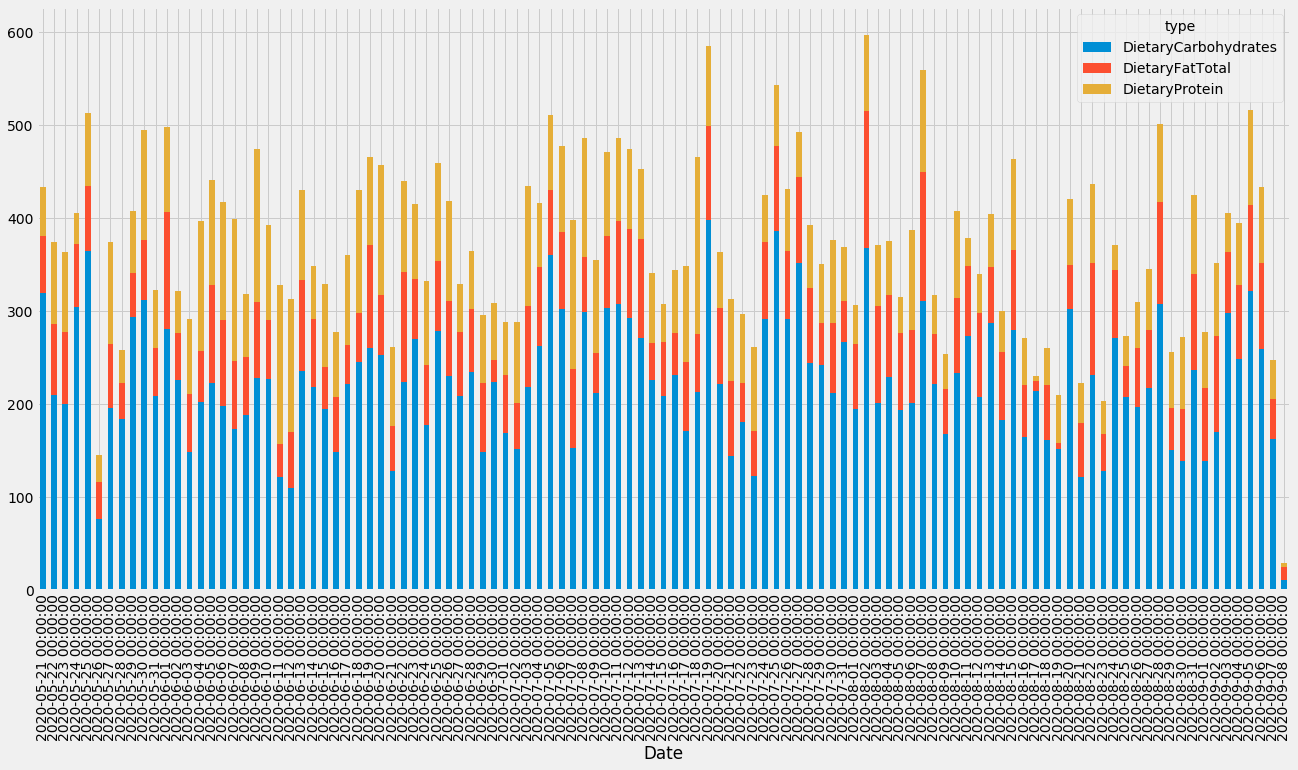

In [187]:
recent_macro = recent_health_data[['Date','DietaryCarbohydrates','DietaryFatTotal','DietaryProtein']].set_index('Date')
recent_macro.plot.bar(stacked=True,figsize=(20,10))

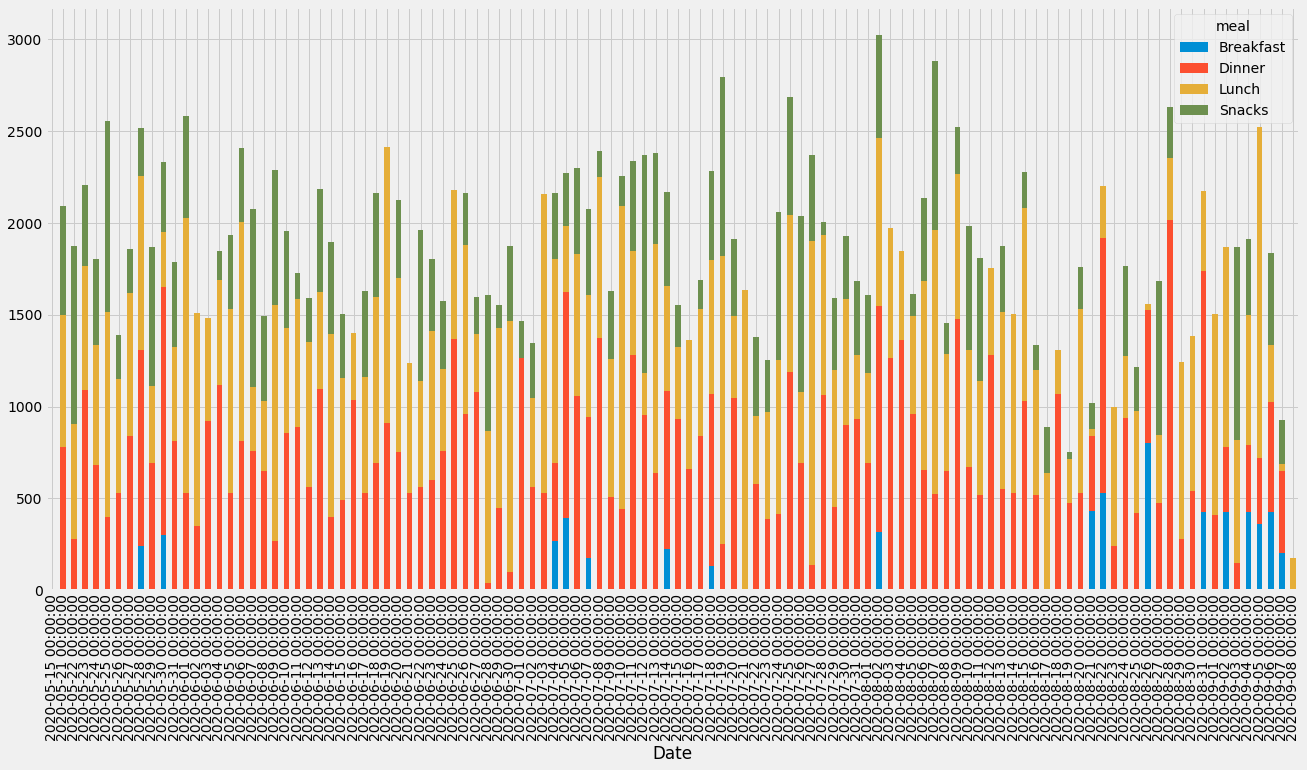

In [188]:
mealtime = health_df[health_df['type'] == 'DietaryEnergyConsumed']
mealtime = mealtime.astype({"value":'float'})
mealtime.groupby(['Date','meal'])['value'].sum().unstack().plot.bar(stacked=True,figsize=(20,10))

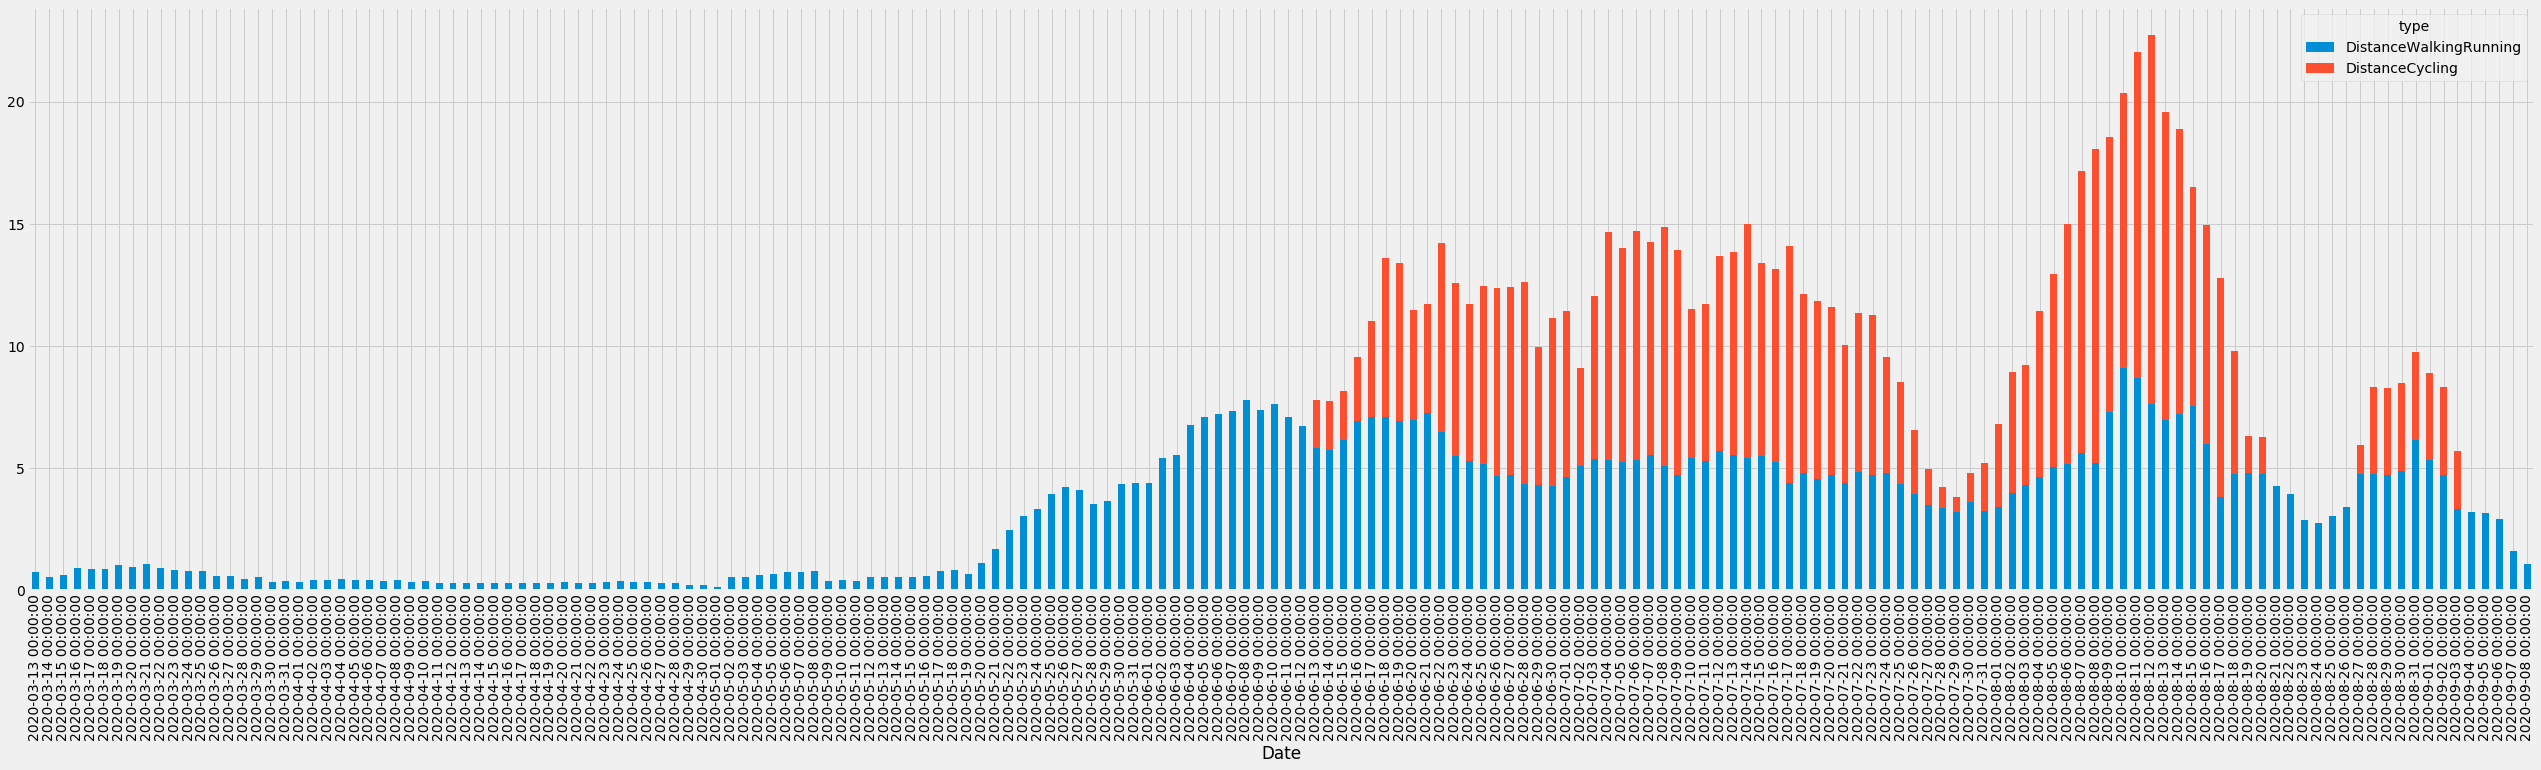

In [189]:
recent_miles = health_data [['Date','DistanceWalkingRunning','DistanceCycling']].set_index('Date').fillna(0).rolling(fitness_rolling_agg).mean().dropna(thresh=1).tail(180)
recent_miles.plot.bar(stacked=True,figsize=(40,10))

In [190]:
health_data.groupby('Day')['StepCount'].mean().reset_index().sort_values('StepCount', ascending=False)

,Day,StepCount
1,Monday,5885.228571
4,Thursday,5875.241135
0,Friday,5763.871429
6,Wednesday,5641.564286
5,Tuesday,5428.148936
2,Saturday,5088.307143
3,Sunday,4322.210145


In [191]:
recent_health_data.groupby('Day')['DistanceCycling'].mean().reset_index().sort_values('DistanceCycling', ascending=False)


,Day,DistanceCycling
2,Saturday,14.389110
4,Thursday,12.784902
0,Friday,12.344699
1,Monday,11.060450
5,Tuesday,10.555042
6,Wednesday,9.470281
3,Sunday,7.360936


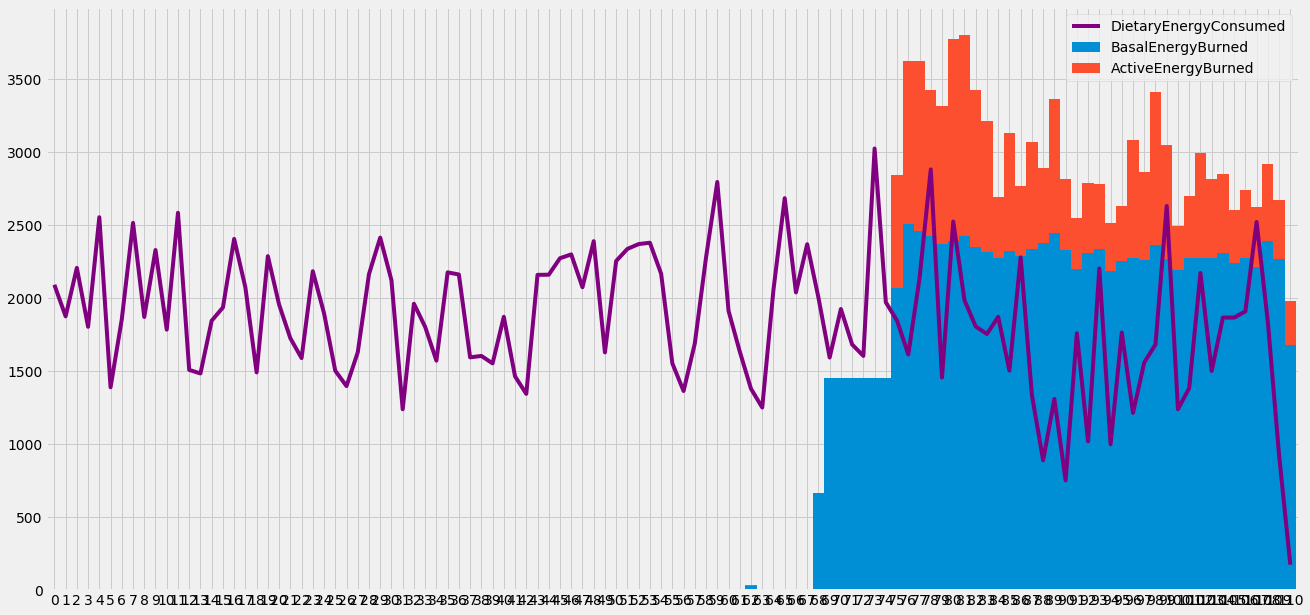

In [192]:
energy = recent_health_data[['Date','DietaryEnergyConsumed','BasalEnergyBurned','ActiveEnergyBurned']].set_index('Date')#.fillna(0).rolling(14).mean()

energy.index=energy.index.strftime('%Y-%m')
energy = energy.reset_index()
ax = energy[['Date','BasalEnergyBurned','ActiveEnergyBurned']].plot(kind='bar', stacked=True, width=1,figsize=(20,10))
energy['DietaryEnergyConsumed'].plot(ax=ax, label='DietaryEnergyConsumed',color=['purple'])
ax.legend()


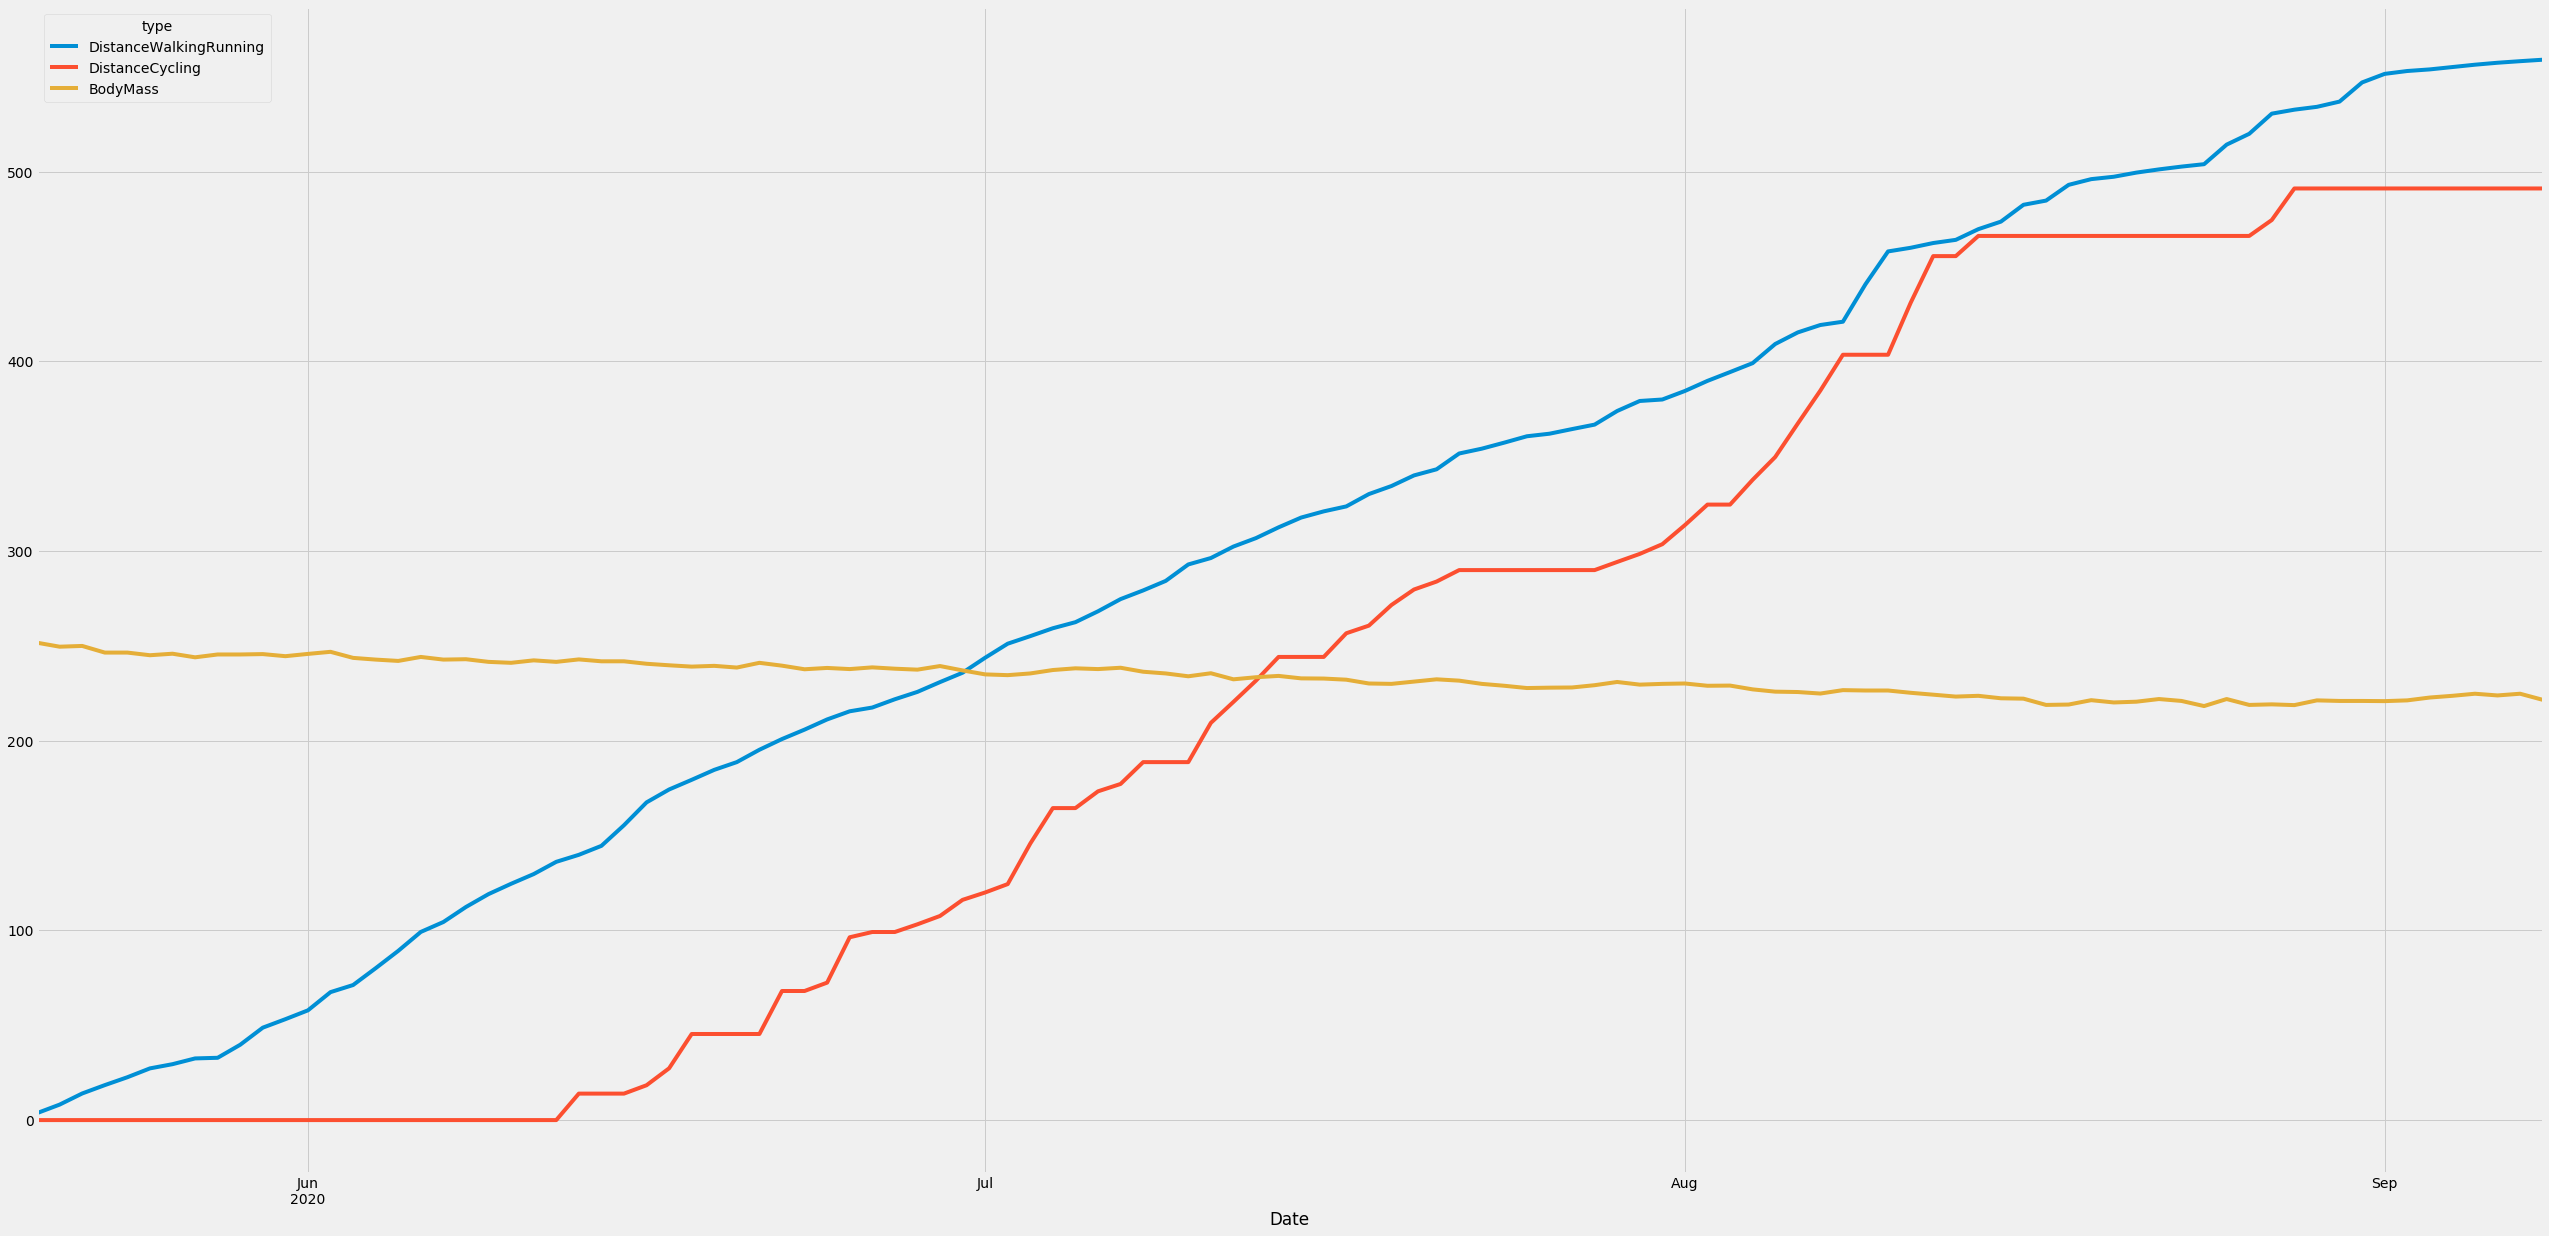

In [193]:
since_when = '2020-05-20'
trip = health_data[['Date','DistanceWalkingRunning','DistanceCycling']][health_data['Date'] >= since_when].set_index('Date').fillna(0).cumsum().reset_index().merge(health_data[['Date','BodyMass']][health_data['Date'] >= since_when].set_index('Date').reset_index(),
left_on='Date',
right_on='Date')
trip.plot(kind='line',
             x='Date',
             y=['DistanceWalkingRunning','DistanceCycling','BodyMass'],
             figsize=(40,20))

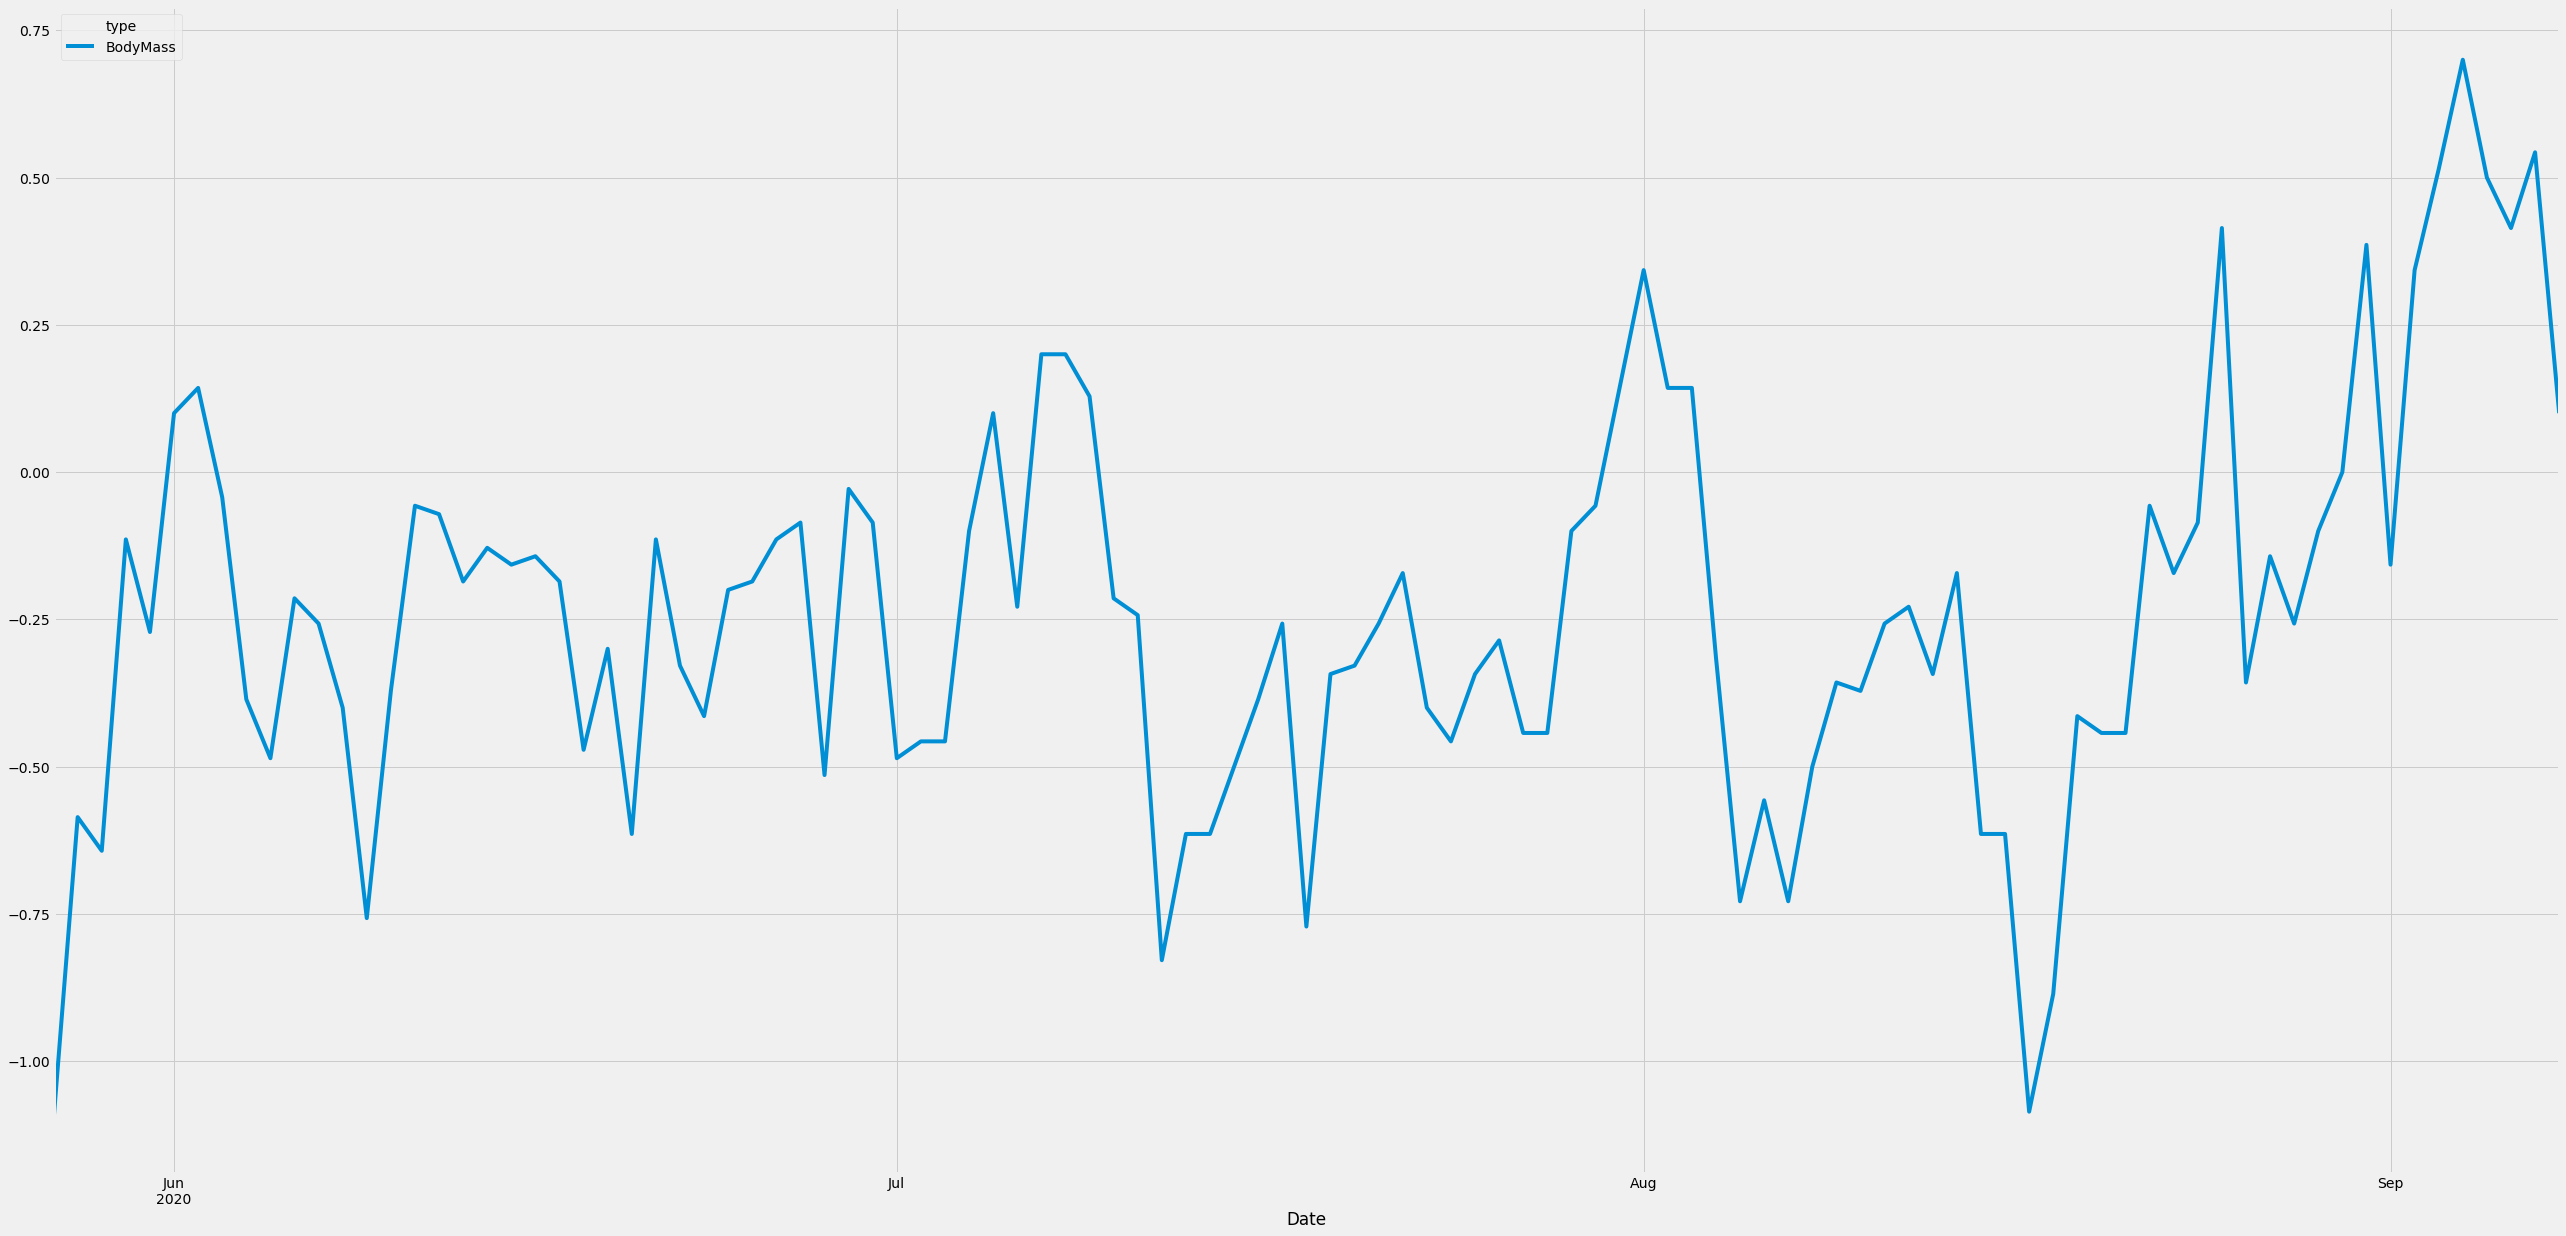

In [194]:
health_data[['Date','BodyMass']].set_index('Date').diff().rolling(fitness_rolling_agg).mean().dropna().reset_index().plot(kind='line',
             x='Date',
             y=['BodyMass'],
             figsize=(40,20))

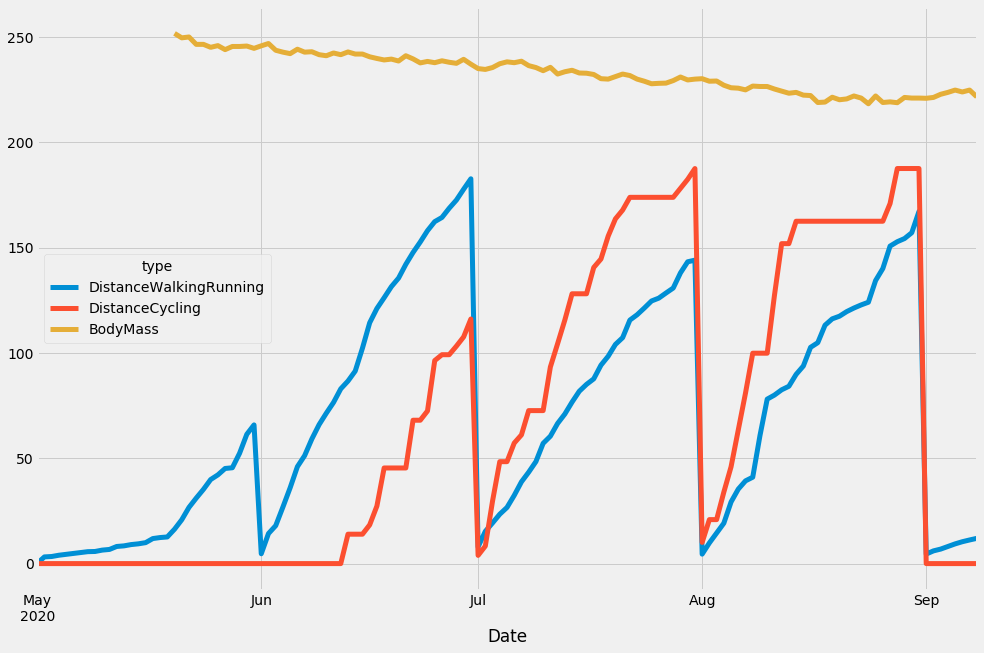

In [250]:
since_when = '2020-05-01'
trip = health_data[['Date','month_year','DistanceWalkingRunning','DistanceCycling']][health_data['Date'] >= since_when]
trip['month_year'] = trip['month_year'].map(str)
trip_append = []
for x in trip['month_year'].unique().tolist():
    monthly_trip_pre = trip[trip['month_year']==x].set_index('Date').fillna(0).cumsum().reset_index()
    monthly_trip = monthly_trip_pre[['Date','DistanceWalkingRunning','DistanceCycling']]
    trip_append.append(monthly_trip)
appended_trip = pd.concat(trip_append)
#body mass only
trip = health_data[['Date','BodyMass']][health_data['Date'] >= since_when]
trip = trip.merge(appended_trip,left_on='Date',right_on='Date', how='left')
trip.plot(kind='line',
          x='Date',
          y=['DistanceWalkingRunning','DistanceCycling','BodyMass'],
          figsize=(15,10),
          linewidth=5
         )